# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install palmerpenguins

In [3]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [5]:
penguins_clean = penguins.dropna()

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

X = penguins_clean.drop('species', axis=1)
X = pd.get_dummies(X, drop_first=True)

# Scaled X data for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = penguins_clean['species']

## KNN (K=3)

In [15]:
# Model 1 (k=3)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the data
y_pred_knn3 = knn3.predict(X_scaled)

cm = confusion_matrix(y, y_pred_knn3)
print("KNN3 Confusion Matrix:")
print(cm)

KNN3 Confusion Matrix:
[[145   1   0]
 [  1  67   0]
 [  0   0 119]]


### Accuracy

In [29]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the model
acc_knn3 = accuracy_score(y, y_pred_knn3)
print(f"KNN3 Accuracy: {acc_knn3:.3f}")

KNN3 Accuracy: 0.994


### ROC Graph

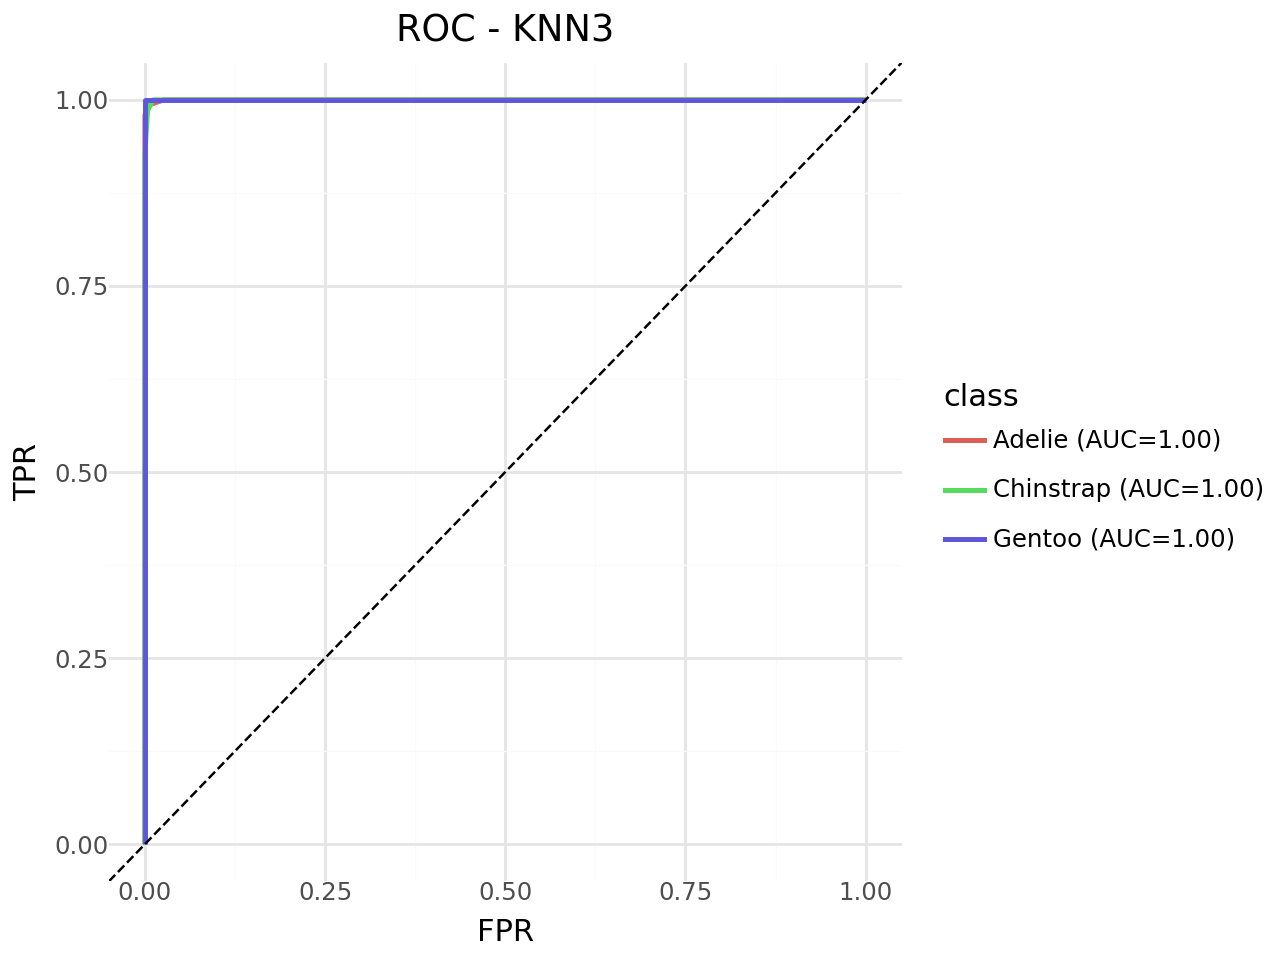

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from plotnine import *

# Get probabilities
y_prob = knn3.predict_proba(X_scaled)
y_bin = label_binarize(y, classes=knn3.classes_)

# Create ROC data
roc_data = []
for i in range(len(knn3.classes_)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_data.append(pd.DataFrame({
        'fpr': fpr, 'tpr': tpr,
        'class': f'{knn3.classes_[i]} (AUC={roc_auc:.2f})'
    }))
roc_df = pd.concat(roc_data)

# Plot
(ggplot(roc_df, aes(x='fpr', y='tpr', color='class')) +
 geom_line(size=1) +
 geom_abline(slope=1, intercept=0, linetype='dashed') +
 labs(title='ROC - KNN3', x='FPR', y='TPR') +
 theme_minimal())

## KNN (K=15)

In [25]:
# Model 2 (k=15)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn15.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=15)

### Confusion Matrix

In [26]:
# Predict the data
y_pred_knn15 = knn15.predict(X_scaled)

cm = confusion_matrix(y, y_pred_knn15)
print("KNN15 Confusion Matrix:")
print(cm)

KNN5 Confusion Matrix:
[[145   1   0]
 [  1  67   0]
 [  0   0 119]]


### Accuracy

In [30]:
# Calculate accuracy for the model
acc_knn15 = accuracy_score(y, y_pred_knn15)
print(f"KNN15 Accuracy: {acc_knn15:.3f}")

KNN15 Accuracy: 0.994


### ROC Graph

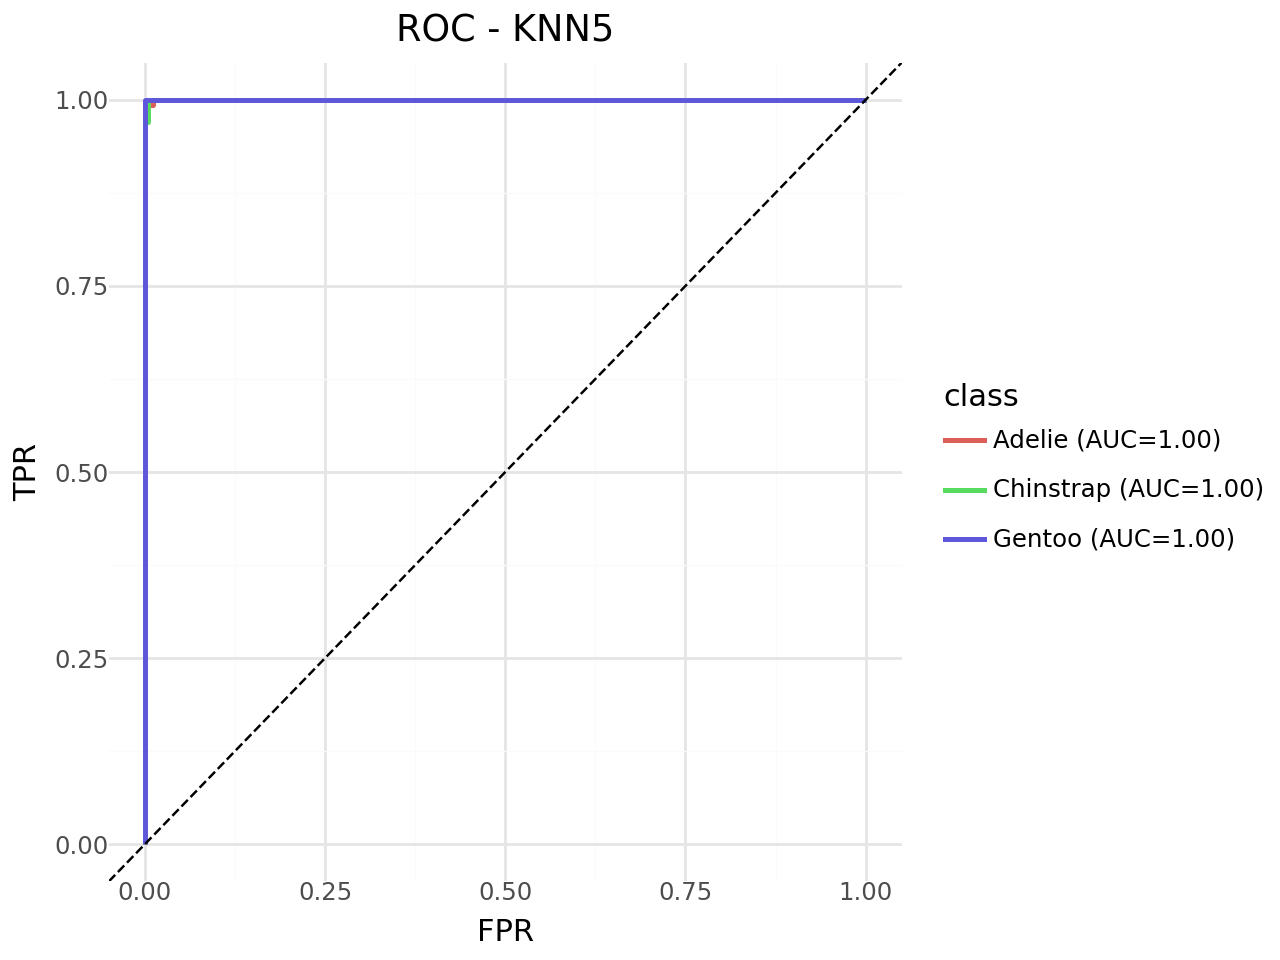

In [34]:
# Get probabilities
y_prob = knn15.predict_proba(X_scaled)
y_bin = label_binarize(y, classes=knn15.classes_)

# Create ROC data
roc_data = []
for i in range(len(knn15.classes_)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_data.append(pd.DataFrame({
        'fpr': fpr, 'tpr': tpr,
        'class': f'{knn15.classes_[i]} (AUC={roc_auc:.2f})'
    }))
roc_df = pd.concat(roc_data)

# Plot
(ggplot(roc_df, aes(x='fpr', y='tpr', color='class')) +
 geom_line(size=1) +
 geom_abline(slope=1, intercept=0, linetype='dashed') +
 labs(title='ROC - KNN5', x='FPR', y='TPR') +
 theme_minimal())

## Simple Decision Tree

In [11]:
# Model 3 (simple tree)
dt_simple = DecisionTreeClassifier(
    max_depth=2,              # Maximum depth of tree
    min_samples_split=20,     # Min samples to split a node
    min_samples_leaf=10,      # Min samples in leaf node
    random_state=42
)
dt_simple.fit(X, y)


DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

### Confusion Matrix

In [27]:
# Predict the data
y_pred_dt_simple = dt_simple.predict(X)

cm = confusion_matrix(y, y_pred_dt_simple)
print("Simple Decision Tree Confusion Matrix:")
print(cm)

Simple Decision Tree Confusion Matrix:
[[140   6   0]
 [  5  63   0]
 [  0   4 115]]


### Accuracy

In [31]:
# Calculate accuracy for the model
acc_dt_simple = accuracy_score(y, y_pred_dt_simple)
print(f"Simple Decision Tree Accuracy: {acc_dt_simple:.3f}")

Simple Decision Tree Accuracy: 0.955


### ROC Graph

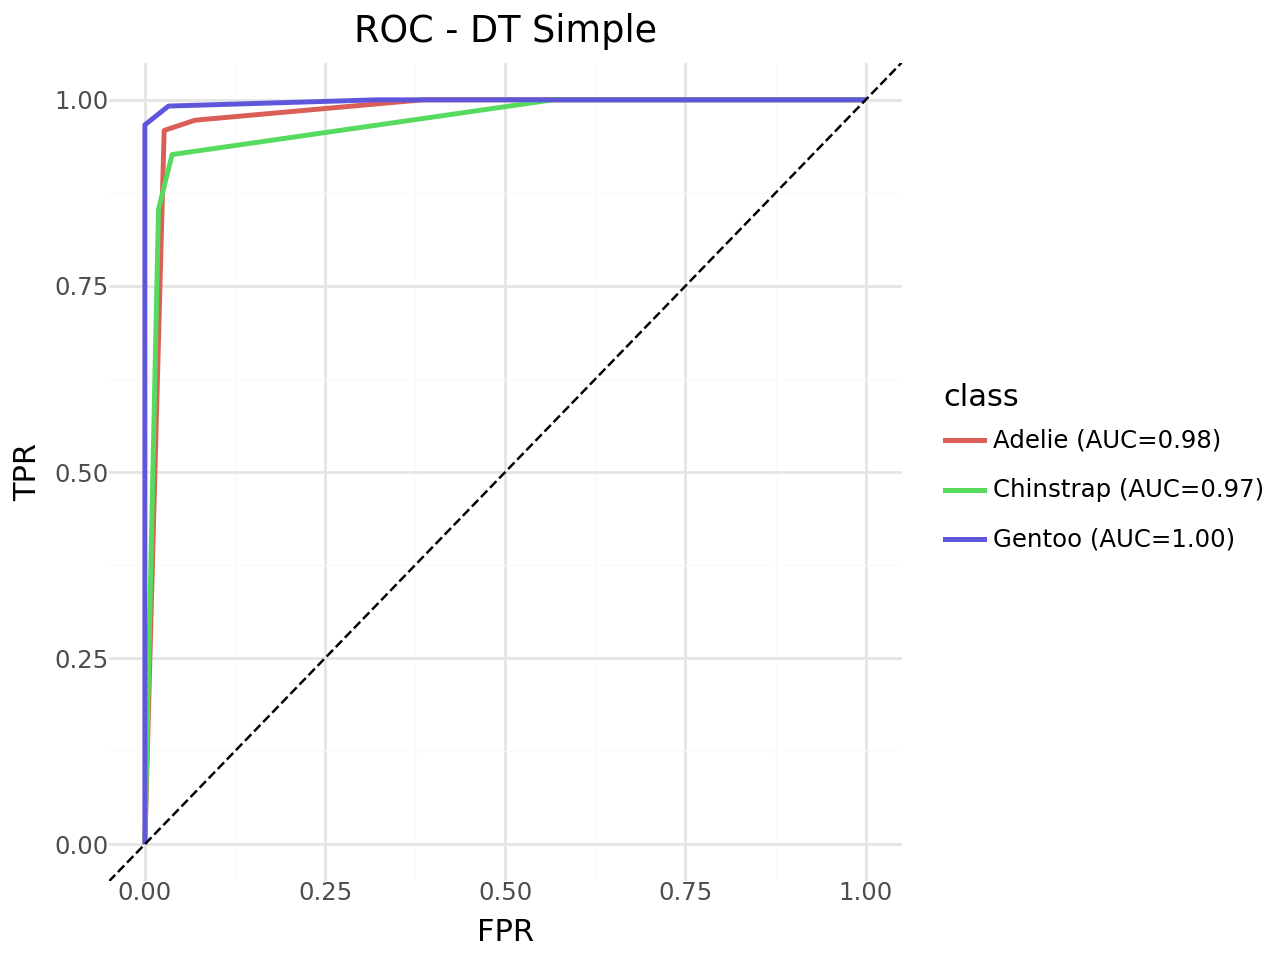

In [35]:
# Get probabilities
y_prob = dt_simple.predict_proba(X)
y_bin = label_binarize(y, classes=dt_simple.classes_)

# Create ROC data
roc_data = []
for i in range(len(dt_simple.classes_)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_data.append(pd.DataFrame({
        'fpr': fpr, 'tpr': tpr,
        'class': f'{dt_simple.classes_[i]} (AUC={roc_auc:.2f})'
    }))
roc_df = pd.concat(roc_data)

# Plot
(ggplot(roc_df, aes(x='fpr', y='tpr', color='class')) +
 geom_line(size=1) +
 geom_abline(slope=1, intercept=0, linetype='dashed') +
 labs(title='ROC - DT Simple', x='FPR', y='TPR') +
 theme_minimal())

## Complex Decision Tree

In [12]:
# Model 4 (complex tree)
dt_complex = DecisionTreeClassifier(
    max_depth=None,           # No limit (default)
    min_samples_split=2,      # Default - will split easily
    min_samples_leaf=1,       # Default - allows tiny leaves
    random_state=42
)
dt_complex.fit(X, y)

DecisionTreeClassifier(random_state=42)

### Confusion Matrix

In [28]:
# Predict the data
y_pred_dt_complex = dt_complex.predict(X)

cm = confusion_matrix(y, y_pred_dt_complex)
print("Complex Decision Tree Confusion Matrix:")
print(cm)

Complex Decision Tree Confusion Matrix:
[[146   0   0]
 [  0  68   0]
 [  0   0 119]]


### Complex Decision Tree

In [32]:
# Calculate accuracy for the model
acc_dt_complex = accuracy_score(y, y_pred_dt_complex)
print(f"Simple Decision Tree Accuracy: {acc_dt_complex:.3f}")

Simple Decision Tree Accuracy: 1.000


### ROC Curve

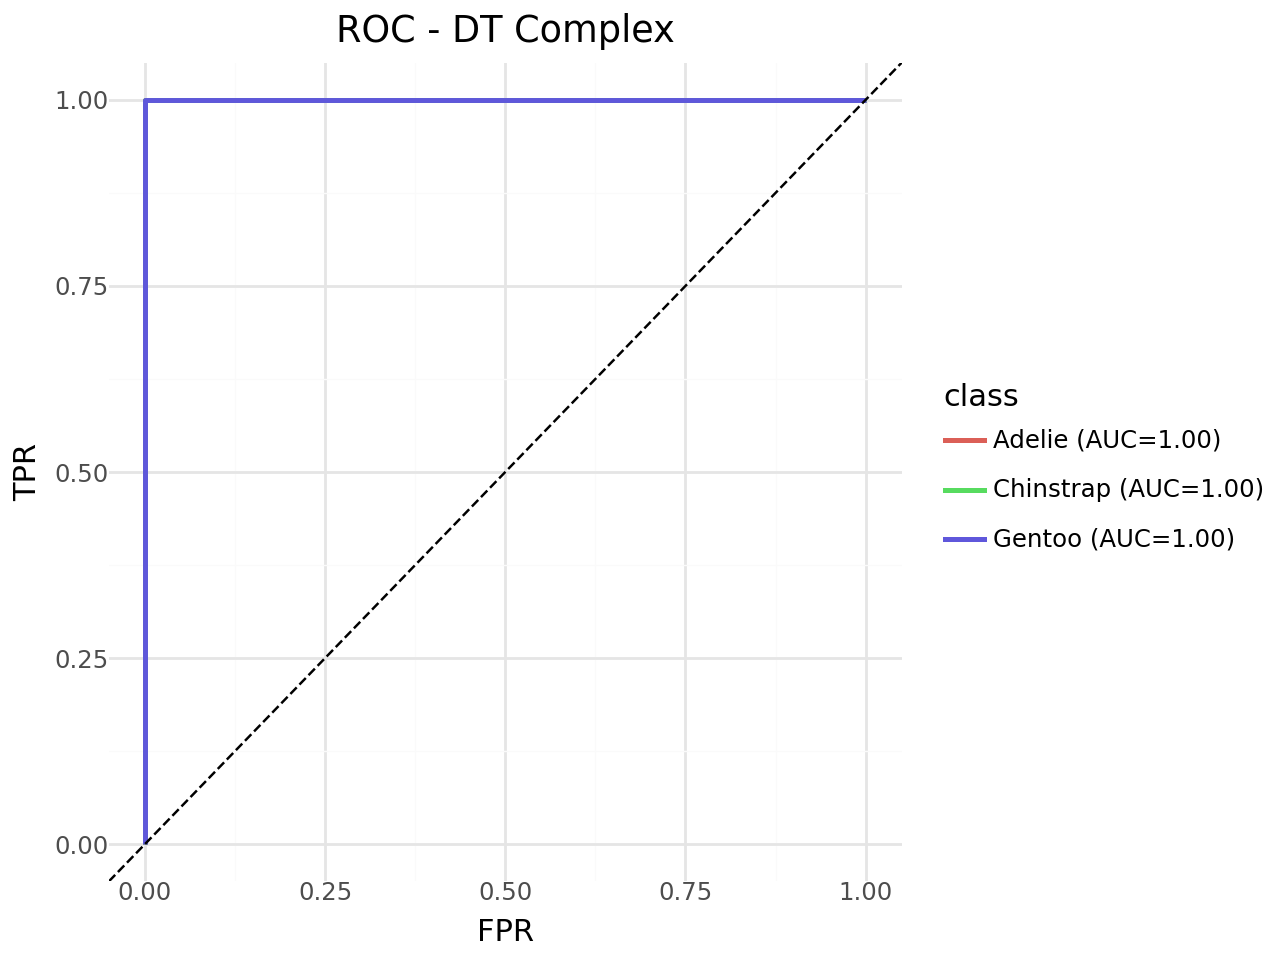

In [36]:
# Get probabilities
y_prob = dt_complex.predict_proba(X)
y_bin = label_binarize(y, classes=dt_complex.classes_)

# Create ROC data
roc_data = []
for i in range(len(dt_complex.classes_)):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    roc_data.append(pd.DataFrame({
        'fpr': fpr, 'tpr': tpr,
        'class': f'{dt_complex.classes_[i]} (AUC={roc_auc:.2f})'
    }))
roc_df = pd.concat(roc_data)

# Plot
(ggplot(roc_df, aes(x='fpr', y='tpr', color='class')) +
 geom_line(size=1) +
 geom_abline(slope=1, intercept=0, linetype='dashed') +
 labs(title='ROC - DT Complex', x='FPR', y='TPR') +
 theme_minimal())